In [5]:
import requests

In [6]:
response = requests.get("https://www.najlepszetrasy.com/tabele-odleglosci-miedzy-miastami/pl/")
response.status_code

200

In [7]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" lang="pl" prefix="og: http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="pl_PL" property="og:locale"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="Mon, 05 Dec 2022 22:42:57 GMT" http-equiv="last-modified"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="Oblicz dokładną odległość między miastami Polska i pobierz tabelę odległości 15 głównych miast Polska jako Excel z odległościami jazdy i lotu (w linii prostej), czasem podróży. Oblicz własną tabelę odległości między dowolnymi miastami." name="description"/>
  <meta content="Oblicz dokładną odległość między miastami Polska i pobierz tabelę odległości 15 głównych miast Polska jako Excel z odległościami jazdy i lotu (w linii prostej), czasem podróży. Oblicz własną tabelę odległości między dowolnymi miastami." property="og:description"/>
  <meta content="Oblicz dokł

In [8]:

import numpy as np

cities = []
table = soup.body.find("div",{"class":"scroll-wrapper"}).table #finding first table on a website 

for i in table.thead.find_all("div",{"class":"vt"}):
    cities.append(i.contents[0])

city_count = len(cities)

distances = np.zeros(shape=(city_count,city_count))
values = []


for row in table.tbody.find_all("tr"):
    for link in row.find_all("a"):
        values.append(link.text.strip())

idx = 0
for i in np.arange(15):
    for j in np.arange(15):
        if i != j:
            distances[i,j] = values[idx]
            idx += 1
        else:
            distances[i,j] = 0

cities, distances



(['Warszawa',
  'Kraków',
  'Lublin',
  'Katowice',
  'Radom',
  'Kielce',
  'Rzeszów',
  'Rybnik',
  'Elbląg',
  'Płock',
  'Wałbrzych',
  'Gorzów Wielkopolski',
  'Włocławek',
  'Chorzów',
  'Koszalin'],
 array([[  0., 294., 172., 295., 105., 176., 318., 336., 278., 110., 437.,
         465., 215., 289., 516.],
        [295.,   0., 309.,  80., 201., 121., 169., 127., 632., 366., 336.,
         543., 379.,  85., 691.],
        [173., 310.,   0., 351., 114., 191., 164., 403., 448., 281., 612.,
         639., 389., 356., 691.],
        [294.,  79., 350.,   0., 242., 161., 248.,  51., 571., 305., 260.,
         467., 317.,   7., 615.],
        [105., 197., 113., 239.,   0.,  78., 192., 291., 382., 183., 489.,
         516., 267., 244., 568.],
        [175., 120., 189., 162.,  81.,   0., 158., 214., 452., 254., 423.,
         513., 263., 167., 565.],
        [318., 168., 170., 248., 192., 157.,   0., 294., 594., 396., 503.,
         710., 546., 253., 858.],
        [335., 126., 407.,  51.

In [9]:
import pandas as pd

data = pd.DataFrame(distances, columns=cities, index = cities)
data


,Warszawa,Kraków,Lublin,Katowice,Radom,Kielce,Rzeszów,Rybnik,Elbląg,Płock,Wałbrzych,Gorzów Wielkopolski,Włocławek,Chorzów,Koszalin
Warszawa,0.0,294.0,172.0,295.0,105.0,176.0,318.0,336.0,278.0,110.0,437.0,465.0,215.0,289.0,516.0
Kraków,295.0,0.0,309.0,80.0,201.0,121.0,169.0,127.0,632.0,366.0,336.0,543.0,379.0,85.0,691.0
Lublin,173.0,310.0,0.0,351.0,114.0,191.0,164.0,403.0,448.0,281.0,612.0,639.0,389.0,356.0,691.0
Katowice,294.0,79.0,350.0,0.0,242.0,161.0,248.0,51.0,571.0,305.0,260.0,467.0,317.0,7.0,615.0
Radom,105.0,197.0,113.0,239.0,0.0,78.0,192.0,291.0,382.0,183.0,489.0,516.0,267.0,244.0,568.0
Kielce,175.0,120.0,189.0,162.0,81.0,0.0,158.0,214.0,452.0,254.0,423.0,513.0,263.0,167.0,565.0
Rzeszów,318.0,168.0,170.0,248.0,192.0,157.0,0.0,294.0,594.0,396.0,503.0,710.0,546.0,253.0,858.0
Rybnik,335.0,126.0,407.0,51.0,299.0,219.0,295.0,0.0,612.0,346.0,254.0,462.0,358.0,49.0,610.0
Elbląg,281.0,577.0,450.0,571.0,387.0,458.0,600.0,612.0,0.0,247.0,687.0,342.0,272.0,565.0,247.0
Płock,108.0,366.0,277.0,305.0,182.0,253.0,396.0,345.0,244.0,0.0,421.0,381.0,50.0,298.0,368.0


In [10]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import seaborn as sns         
from sklearn.metrics.pairwise import euclidean_distances


In [51]:
mds = MDS(n_components=2, metric=True, n_init=15, max_iter=5000) # Metric MDS
data_transform = mds.fit_transform(distances)
print(data_transform)

C:\Users\tunam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


[[-349.34987926  133.87863765]
 [-113.84018145 -608.9095956 ]
 [-660.82785141  -45.74225728]
 [  63.59662694 -561.1919349 ]
 [-428.44648789 -113.28106524]
 [-300.52568563 -299.32124168]
 [-567.38883743 -555.71235106]
 [ 179.17929596 -528.31085177]
 [  87.54206871  922.27775355]
 [-191.15938354  335.95634409]
 [ 690.81157652 -186.26178918]
 [ 760.11638473  498.09634735]
 [  12.68288337  372.53663047]
 [  69.51635919 -548.04227961]
 [ 748.09311118 1184.02765321]]


C:\Users\tunam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\tunam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\tunam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilari

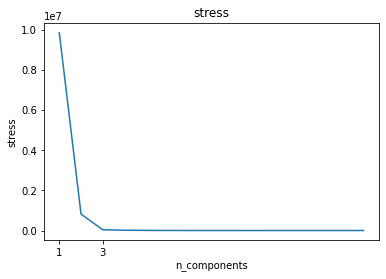

[9853397.064731177, 819604.3800630118, 37358.61934312428, 15115.828977357909, 6217.187971295313, 2863.2254870886354, 1796.442558440198, 1433.546338047695, 1023.1186819465458, 899.5222764694231, 669.5160903535461, 740.8729552086022, 684.1251948224472, 728.2693415658899, 702.5337763745529]


In [60]:
stress = [] # The final value of the stress (sum of squared distance of the disparities and the distances for all constrained points).
for i in np.arange(1, 16):
    mds = MDS(n_components=i, metric=True, n_init=15, max_iter=5000)
    # Apply MDS
    pts = mds.fit_transform(distances)
    # Retrieve the stress value
    stress.append(mds.stress_)

# Plot stress vs. n_components    
plt.plot(range(1, 16), stress)
plt.xticks(range(1, 5, 2))
plt.title('stress')
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()
print(stress)


In [61]:
#Kruskal's first stress
mds = MDS(n_components=2, metric=True, n_init=15, max_iter=5000) # Metric MDS
data_transform = mds.fit_transform(distances)
print(data_transform)


C:\Users\tunam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


[[  322.46659767   189.71249495]
 [ -405.15403431   468.59050452]
 [  376.17295523   545.23810444]
 [ -478.44825776   300.1029342 ]
 [  178.50872538   405.63021972]
 [  -46.70244274   421.57665428]
 [  -80.83542871   790.07104724]
 [ -524.78759962   189.22897515]
 [  666.63246283  -643.35070017]
 [  381.87540582   -59.94736725]
 [ -576.26415087  -424.04889675]
 [  -84.32575131  -904.83905337]
 [  283.42496944  -242.13731595]
 [ -471.85601263   287.27718914]
 [  459.29256159 -1323.10479014]]


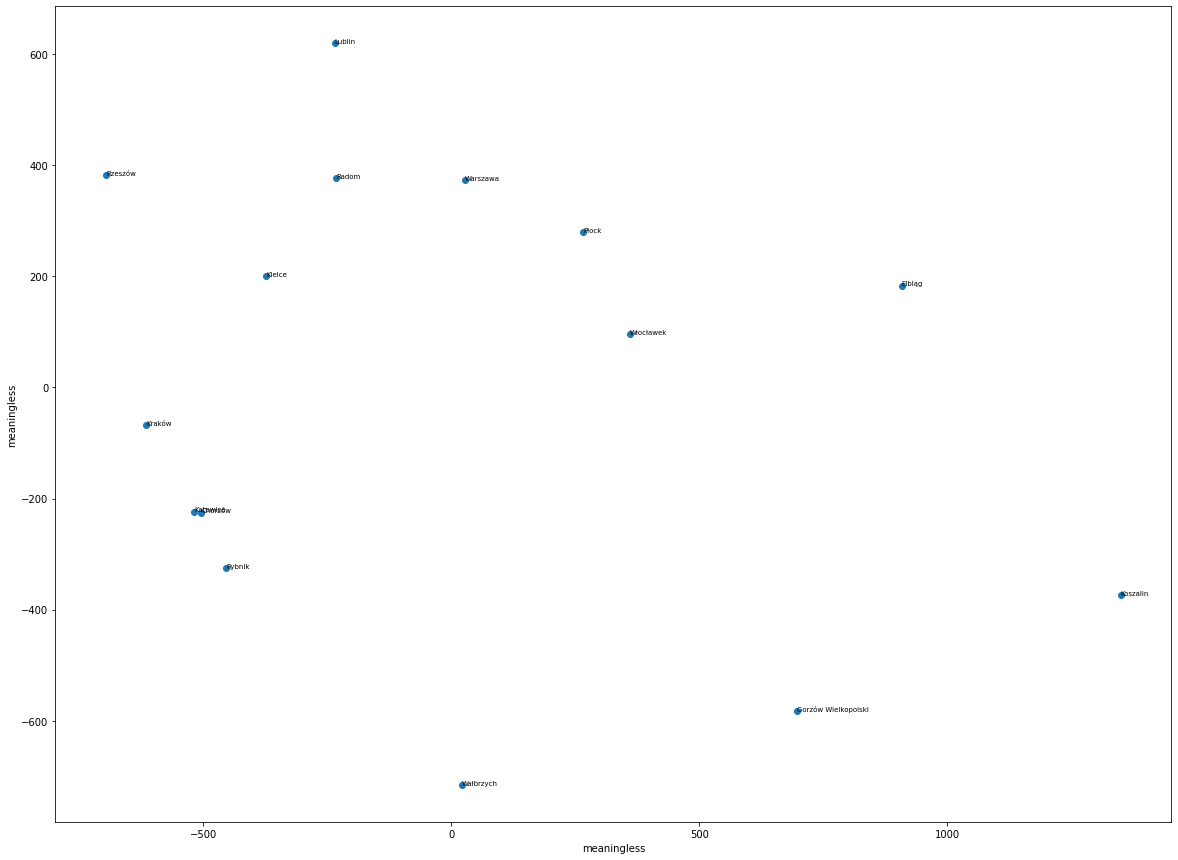

In [50]:
import matplotlib.pyplot as plt
#%matplotlib        =>     show in separate window
#%matplotlib inline =>     inline show in console window
fig = plt.figure(figsize=(20,15),facecolor='white')

x,y = data_transform[:,0],data_transform[:,1]

ax = fig.add_subplot(111)
ax.scatter(y,x) 
for i in range(len(data_transform)): 
    ax.text(data_transform[i,1],data_transform[i,0],  '%s' % (cities[i]), size=7, zorder=1,  
    c='black') 

ax.set_xlabel('meaningless')
ax.set_ylabel('meaningless')

plt.show()

# plot shows a map of Poland but rotated by 90 deg and in reflection symmetry yet the distance and location of points represents those of real ones